# Processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/dataset_normalized_fin.csv')
df.head(5)

,CHRONIC_DISEASE,ANXIETY,AGE,CHEST_PAIN,LUNG_CANCER,PEER_PRESSURE,COUGHING,YELLOW_FINGERS,BREATHING_ISSUE,ALCOHOL_CONSUMING,SMOKING,GENDER
0,0,1,68,1,0,1,1,1,0,1,1,1
1,1,0,81,0,1,1,1,0,1,0,1,1
2,0,0,58,0,0,0,0,0,1,1,1,1
3,0,1,44,0,1,1,1,0,1,0,1,0
4,1,1,72,0,1,1,1,1,1,0,1,0


In [ ]:
df.describe()

,CHRONIC_DISEASE,ANXIETY,AGE,CHEST_PAIN,LUNG_CANCER,PEER_PRESSURE,COUGHING,YELLOW_FINGERS,BREATHING_ISSUE,ALCOHOL_CONSUMING,SMOKING,GENDER
count,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000
mean,0.496828,0.503861,60.205893,0.542659,0.702078,0.502528,0.572309,0.554427,0.623196,0.503494,0.554059,0.515767
std,0.500001,0.499997,11.842313,0.498188,0.457356,0.500005,0.494755,0.497040,0.484596,0.499999,0.497080,0.499763
min,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
CHRONIC_DISEASE,0
ANXIETY,0
AGE,0
CHEST_PAIN,0
LUNG_CANCER,0
PEER_PRESSURE,0
COUGHING,0
YELLOW_FINGERS,0
BREATHING_ISSUE,0
ALCOHOL_CONSUMING,0


In [ ]:
df.dtypes

,0
CHRONIC_DISEASE,int64
ANXIETY,int64
AGE,int64
CHEST_PAIN,int64
LUNG_CANCER,int64
PEER_PRESSURE,int64
COUGHING,int64
YELLOW_FINGERS,int64
BREATHING_ISSUE,int64
ALCOHOL_CONSUMING,int64


In [ ]:
df['GENDER'] = df['GENDER'].astype(str).map({'M': 1, 'F': 0, '1': 1, '0': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

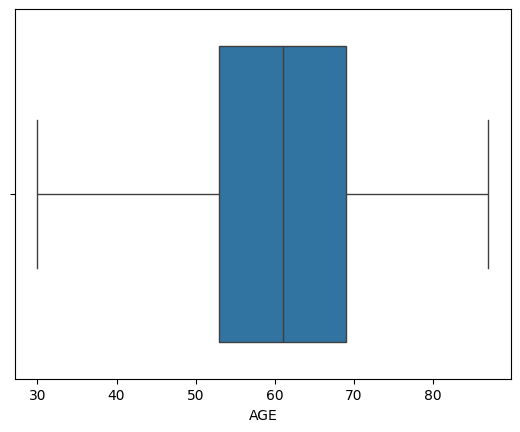

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['AGE'])
plt.show()

In [ ]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['AGE'] < Q1 - 1.5*IQR) | (df['AGE'] > Q3 + 1.5*IQR)]
outliers.shape

(0, 12)

In [ ]:
df.duplicated().sum()

np.int64(2326)

In [ ]:
df[df.duplicated()]

,CHRONIC_DISEASE,ANXIETY,AGE,CHEST_PAIN,LUNG_CANCER,PEER_PRESSURE,COUGHING,YELLOW_FINGERS,BREATHING_ISSUE,ALCOHOL_CONSUMING,SMOKING,GENDER
361,0,0,62,0,NaN,0,1,0,1,0,1,1
644,1,1,78,1,NaN,1,1,1,1,0,1,0
684,0,1,64,1,NaN,0,1,1,1,0,1,0
966,1,1,77,1,NaN,0,0,1,1,0,1,1
990,0,1,48,0,NaN,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21734,0,1,64,1,NaN,0,1,0,1,1,0,1
21735,0,0,52,0,NaN,0,0,1,1,1,1,1
21736,0,1,75,0,NaN,0,1,1,1,1,0,1
21744,0,0,55,0,NaN,0,0,1,1,1,1,0


In [ ]:
df = df.drop_duplicates()
df.shape

(19428, 12)

In [ ]:
df.isna().sum()

,0
CHRONIC_DISEASE,0
ANXIETY,0
AGE,0
CHEST_PAIN,0
LUNG_CANCER,19428
PEER_PRESSURE,0
COUGHING,0
YELLOW_FINGERS,0
BREATHING_ISSUE,0
ALCOHOL_CONSUMING,0


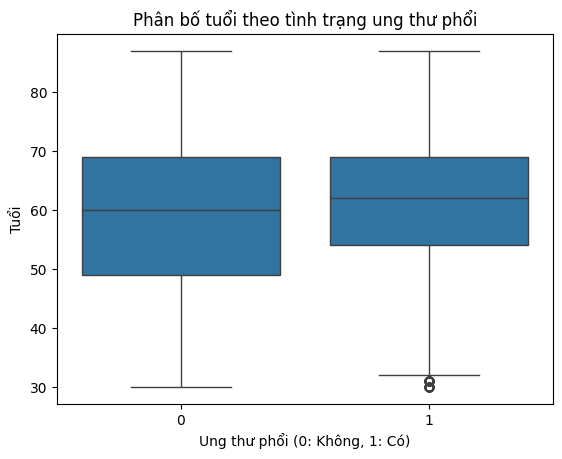

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='LUNG_CANCER', y='AGE')
plt.title('Phân bố tuổi theo tình trạng ung thư phổi')
plt.xlabel('Ung thư phổi (0: Không, 1: Có)')
plt.ylabel('Tuổi')
plt.show()

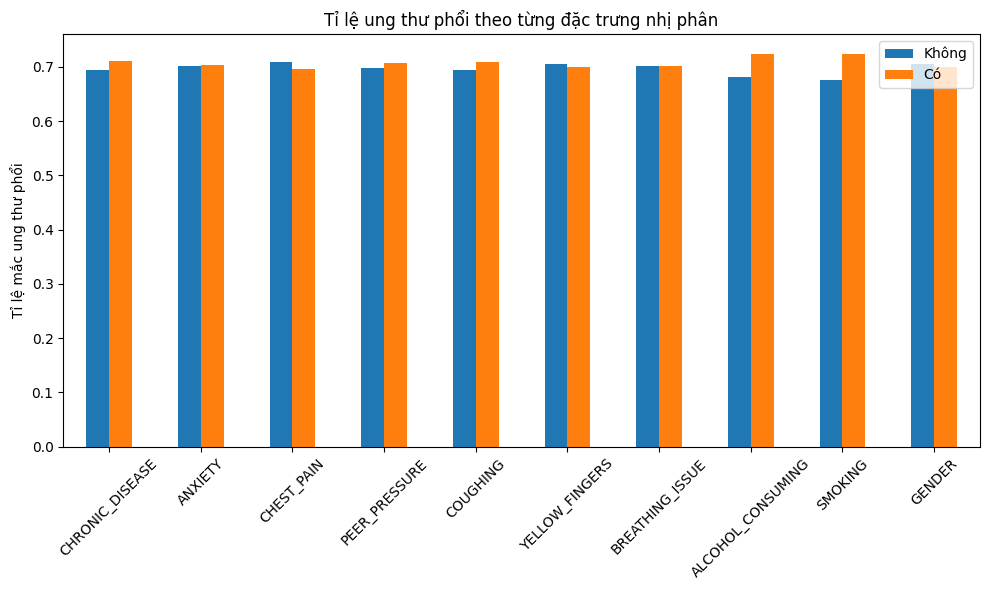

In [ ]:
binary_features = ['CHRONIC_DISEASE', 'ANXIETY', 'CHEST_PAIN', 'PEER_PRESSURE',
                   'COUGHING', 'YELLOW_FINGERS', 'BREATHING_ISSUE',
                   'ALCOHOL_CONSUMING', 'SMOKING', 'GENDER']

lung_cancer_rate = {}

for feature in binary_features:
    rate = df.groupby(feature)['LUNG_CANCER'].mean()
    lung_cancer_rate[feature] = rate

rate_df = pd.DataFrame(lung_cancer_rate).T
rate_df.columns = ['Không', 'Có']
rate_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Tỉ lệ mắc ung thư phổi')
plt.title('Tỉ lệ ung thư phổi theo từng đặc trưng nhị phân')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

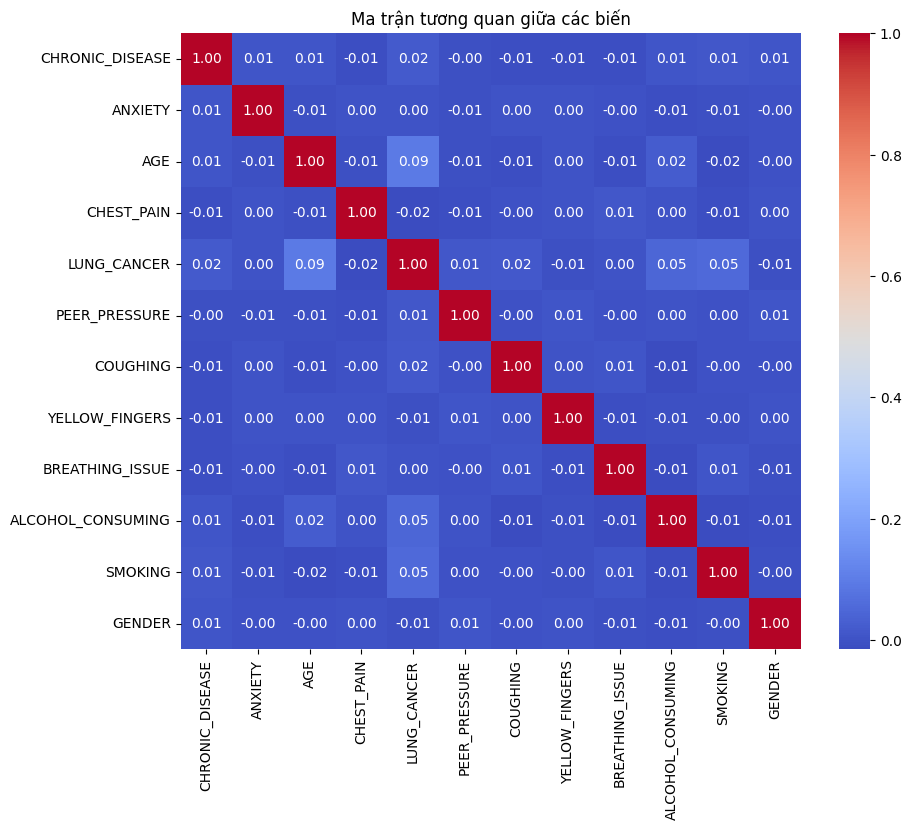

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.show()

In [ ]:
df

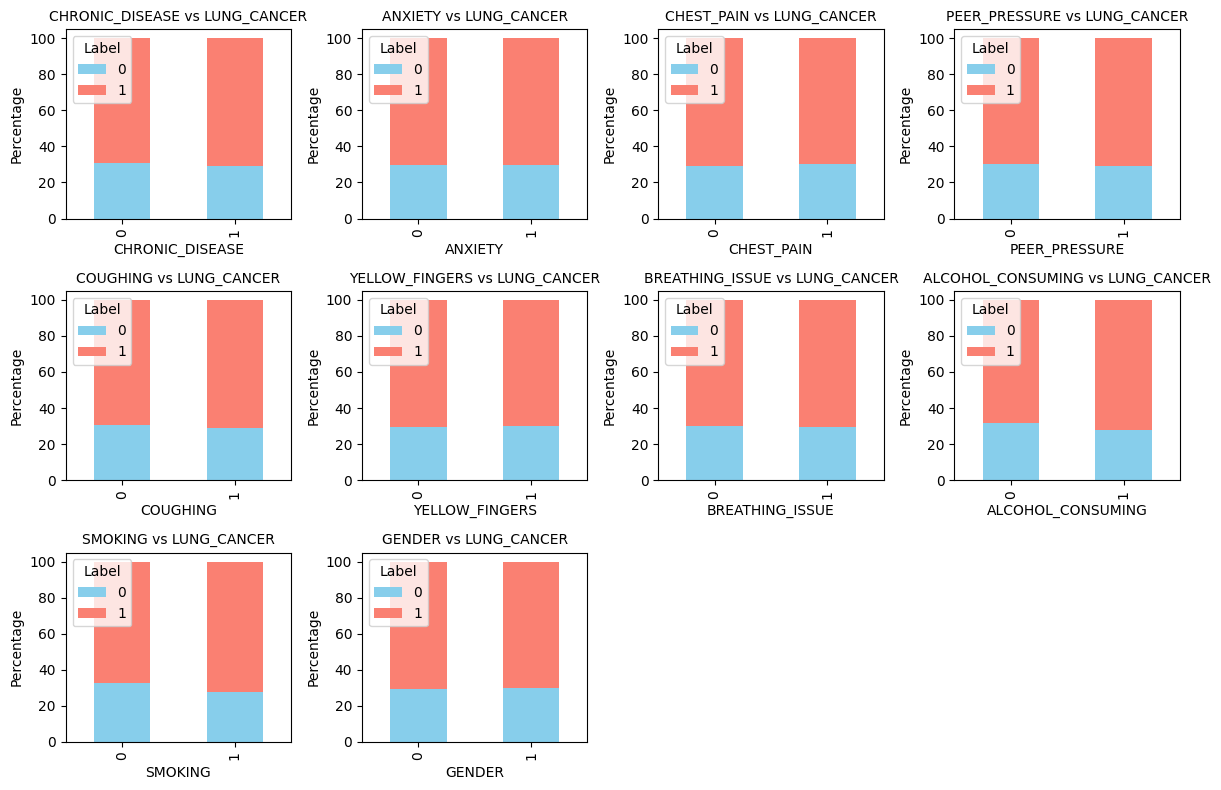

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('final_final_dataset.csv')
column_names = [
    'CHRONIC_DISEASE', 'ANXIETY', 'CHEST_PAIN',
    'PEER_PRESSURE', 'COUGHING', 'YELLOW_FINGERS', 'BREATHING_ISSUE',
    'ALCOHOL_CONSUMING', 'SMOKING', 'GENDER'
]
target_column = 'LUNG_CANCER'


# Thiết lập kích thước lưới subplot
num_column = len(column_names)
fig, axes = plt.subplots(
    nrows=(num_column + 3) // 4,    # Số hàng
    ncols=4,                        # Số cột
    figsize=(12, 4 * ((num_column + 1) // 4)),  # Kích thước tổng thể
)

axes = axes.flatten()  # Chuyển axes thành 1D để dễ truy cập

for i, column in enumerate(column_names):
    # Bảng tần suất chéo với phần trăm
    crosstab = pd.crosstab(
        dataset[column],
        dataset[target_column],
        normalize='index'  # Chuẩn hóa theo hàng
    ) * 100

    # Vẽ biểu đồ stacked bar
    crosstab.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],  # Subplot tương ứng
        color=['skyblue', 'salmon']  # Màu tùy chỉnh
    )

    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'{column} vs {target_column}', fontsize=10)
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Label', loc='upper left')

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

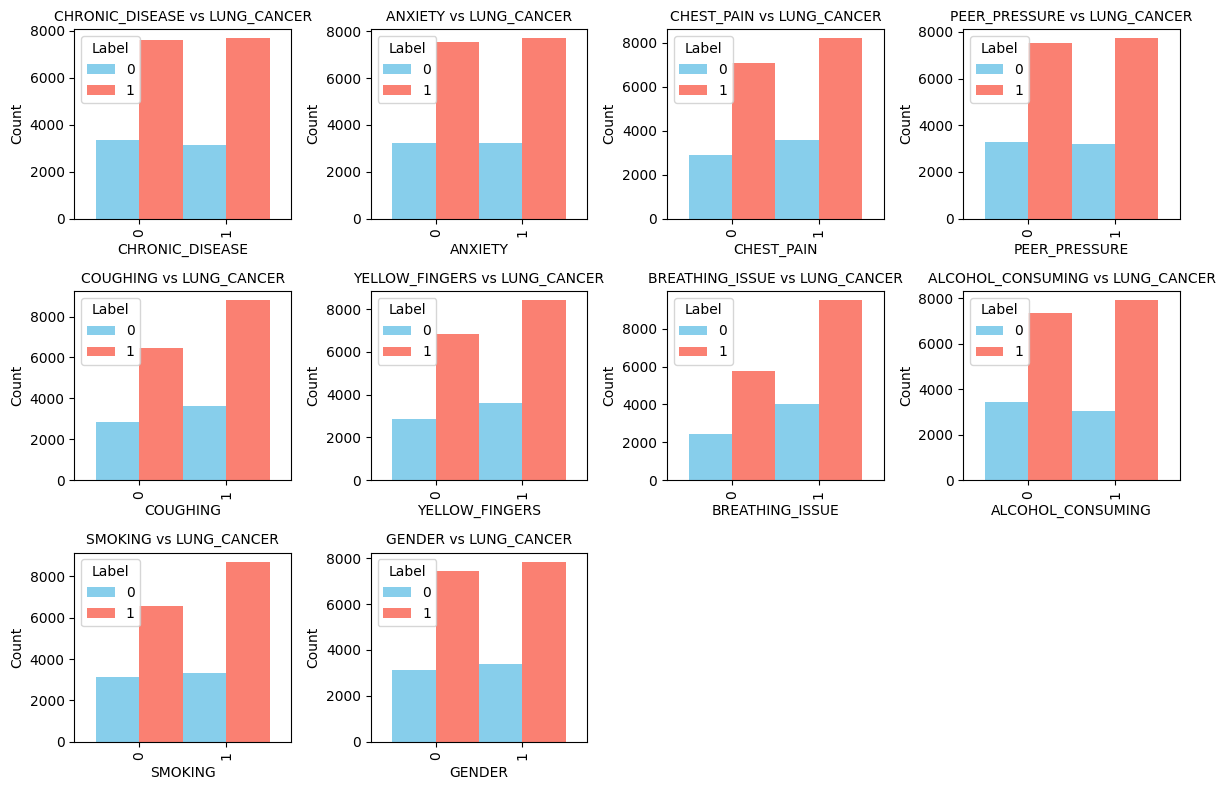

In [ ]:
# Thiết lập kích thước lưới subplot
num_column = len(column_names)
fig, axes = plt.subplots(
    nrows=(num_column + 3) // 4,    # Số hàng
    ncols=4,                        # Số cột
    figsize=(12, 4 * ((num_column + 1) // 4)),  # Kích thước tổng thể
)

axes = axes.flatten()  # Chuyển axes thành 1D để dễ truy cập

for i, column in enumerate(column_names):
    # Bảng tần suất chéo với phần trăm
    crosstab = pd.crosstab(
        dataset[column],
        dataset[target_column],
    )

    # Vẽ biểu đồ stacked bar
    crosstab.plot(
        kind='bar',
        ax=axes[i],  # Subplot tương ứng
        color=['skyblue', 'salmon'],  # Màu tùy chỉnh
        width=1
    )

    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'{column} vs {target_column}', fontsize=10)
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Label', loc='upper left')

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

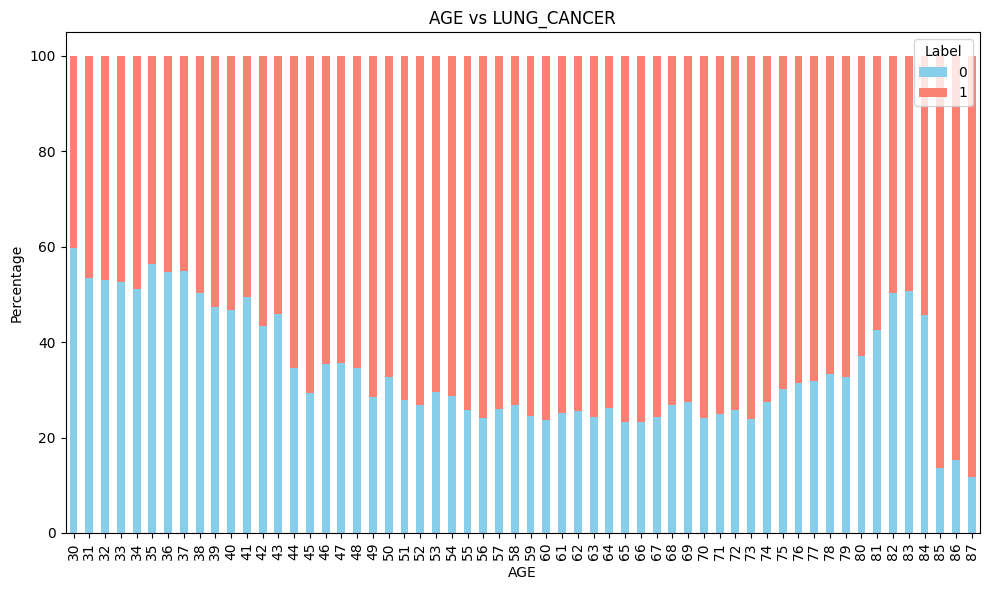

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('dataset_normalized_fin.csv')
column='AGE'
target_column = 'LUNG_CANCER'

# Tạo bảng tần suất chéo (crosstab), chuẩn hóa theo hàng (tính phần trăm)
crosstab = pd.crosstab(
    dataset[column],
    dataset[target_column],
    normalize='index'
) * 100  # đổi thành %

# Vẽ biểu đồ stacked bar
crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'salmon']
)

# Thiết lập nhãn và tiêu đề
plt.title(f'{column} vs {target_column}')
plt.xlabel(column)
plt.ylabel('Percentage')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

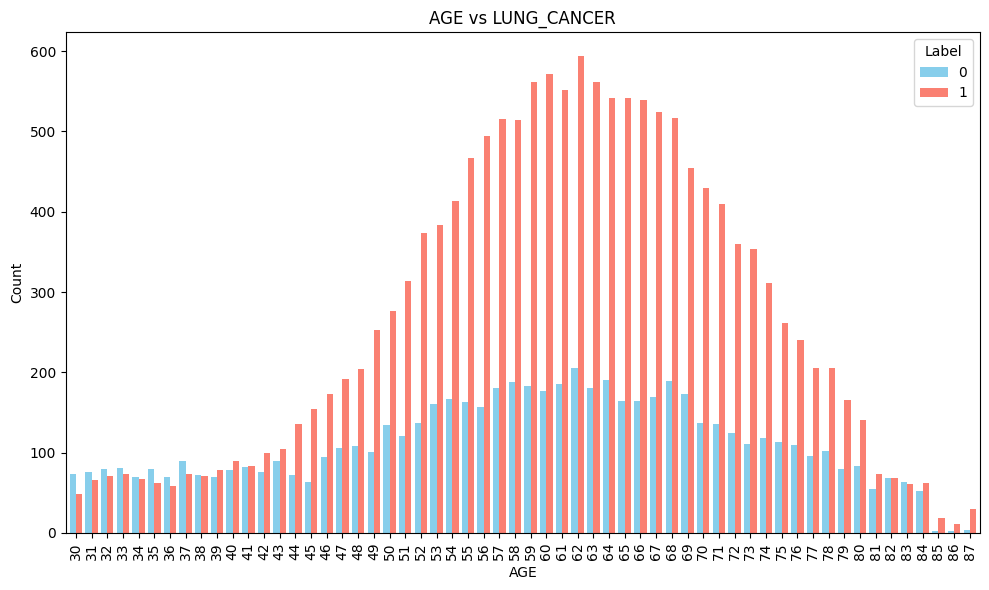

In [ ]:
column='AGE'

# Tạo bảng tần suất chéo (crosstab), chuẩn hóa theo hàng (tính phần trăm)
crosstab = pd.crosstab(
    dataset[column],
    dataset[target_column],
)

# Vẽ biểu đồ stacked bar
crosstab.plot(
    kind='bar',
    figsize=(10, 6),
    color=['skyblue', 'salmon'],
    width=0.8
)

# Thiết lập nhãn và tiêu đề
plt.title(f'{column} vs {target_column}')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

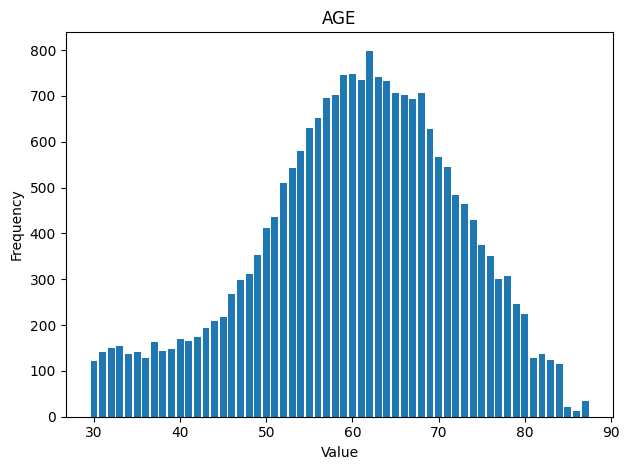

In [ ]:
data_counts = dataset['AGE'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.bar(data_counts.index, data_counts.values)


# Tùy chỉnh biểu đồ
plt.title("AGE")
plt.xlabel("Value")
plt.ylabel("Frequency")
 # Đảm bảo các tên category không bị nghiêng
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

# Training Model

In [ ]:
# Xử lý dữ liệu
import pandas as pd
import numpy as np

# Vẽ biểu đồ
import matplotlib.pyplot as plt

# Tiền xử lý và chia tập
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Mô hình học máy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Đánh giá mô hình
from sklearn.metrics import (
    f1_score,
    classification_report,
    balanced_accuracy_score,
    make_scorer,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance

# Xử lý mất cân bằng dữ liệu
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Gán tên cột đúng
column_names = [
    'CHRONIC_DISEASE', 'ANXIETY', 'AGE', 'CHEST_PAIN', 'LUNG_CANCER',
    'PEER_PRESSURE', 'COUGHING', 'YELLOW_FINGERS', 'BREATHING_ISSUE',
    'ALCOHOL_CONSUMING', 'SMOKING', 'GENDER'
]

# Đọc dữ liệu và gán tên cột
data = pd.read_csv('dataset_normalized_fin.csv')
data.columns = column_names

# Tách nhãn và đặc trưng
y = data['LUNG_CANCER']
X = data.drop(columns=['LUNG_CANCER'])

print(y.value_counts())

# Chia dữ liệu train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

LUNG_CANCER
1    15273
0     6481
Name: count, dtype: int64


## KNN

Fitting 5 folds for each of 76 candidates, totalling 380 fits

Best parameters: {'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}
Best F1-score (label=1): 0.8194

Các thuộc tính có độ quan trọng âm:
Empty DataFrame
Columns: [Feature, Importance Mean, Importance Std]
Index: []


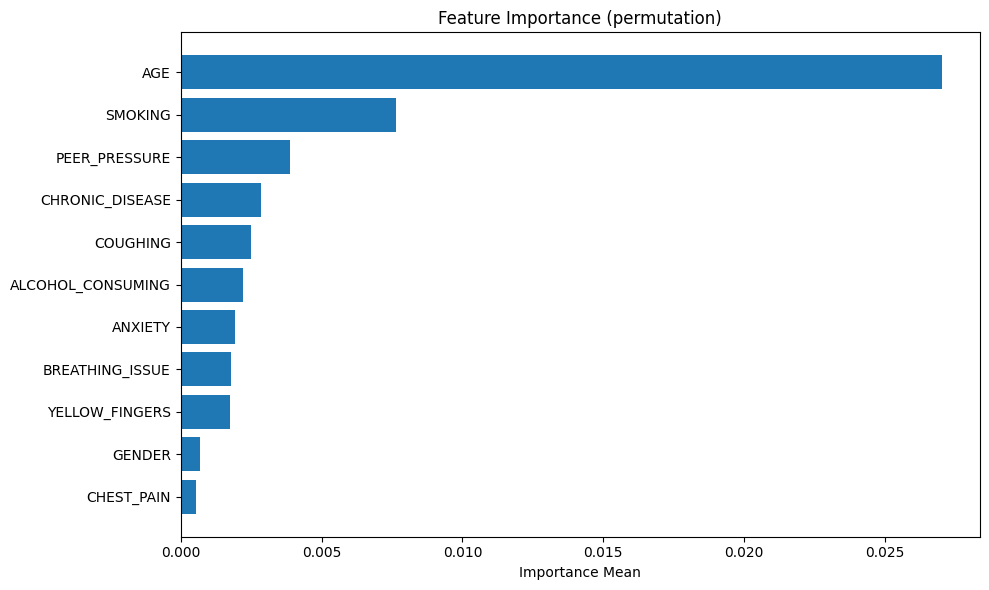


=== Classification Report trên tập validation ===
              precision    recall  f1-score   support

           0     0.6238    0.1497    0.2414      1296
           1     0.7272    0.9617    0.8282      3055

    accuracy                         0.7198      4351
   macro avg     0.6755    0.5557    0.5348      4351
weighted avg     0.6964    0.7198    0.6534      4351

Final F1-score (label=1): 0.8282


In [ ]:
# Định nghĩa các tham số cho GridSearchCV
param_grid = {
    'n_neighbors': range(1, 20),
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()

# Ưu tiên F1-score cho nhãn 1
f1_cancer = make_scorer(f1_score, pos_label=1)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=f1_cancer,
    cv=5,
    verbose=1
)

# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

# In ra kết quả tối ưu
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best F1-score (label=1): {grid_search.best_score_:.4f}")

# Mô hình tốt nhất
best_model = grid_search.best_estimator_

# Tính độ quan trọng của đặc trưng bằng permutation importance
perm_importance = permutation_importance(best_model, X_val, y_val, n_repeats=100, random_state=42)

# Tạo DataFrame độ quan trọng
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

# In các thuộc tính có độ quan trọng âm (không hữu ích)
print("\nCác thuộc tính có độ quan trọng âm:")
print(importance_df[importance_df['Importance Mean'] < 0])

# Vẽ biểu đồ độ quan trọng
importance_df.sort_values(by='Importance Mean', ascending=True, inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance Mean'])
plt.xlabel('Importance Mean')
plt.title('Feature Importance (permutation)')
plt.tight_layout()
plt.show()

# Lọc các đặc trưng quan trọng dương
important_features = importance_df[importance_df['Importance Mean'] > 0]['Feature']

# Gộp lại tập train + validation và chọn đặc trưng quan trọng
X_train_val = pd.concat([X_train, X_val], axis=0)[important_features]
y_train_val = pd.concat([y_train, y_val], axis=0)

# Huấn luyện lại mô hình tốt nhất với các đặc trưng quan trọng
best_model.fit(X_train_val, y_train_val)

# Đánh giá trên tập validation ban đầu
y_val_pred = best_model.predict(X_val[important_features])
print("\n=== Classification Report trên tập validation ===")
print(classification_report(y_val, y_val_pred, digits=4))

# In F1-score cuối cùng cho nhãn 1
final_f1 = f1_score(y_val, y_val_pred, pos_label=1)
print(f"Final F1-score (label=1): {final_f1:.4f}")


## Logistics Regression

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(



Best parameters: {'C': np.float64(0.01), 'l1_ratio': 0.5, 'penalty': 'l1', 'solver': 'saga'}
Best F1-score (label=1): 0.6403
              Feature  Importance Mean  Importance Std
0     CHRONIC_DISEASE         0.000000        0.000000
1             ANXIETY         0.000000        0.000000
2                 AGE         0.019400        0.006527
3          CHEST_PAIN         0.000000        0.000000
4       PEER_PRESSURE         0.000000        0.000000
5            COUGHING         0.000000        0.000000
6      YELLOW_FINGERS         0.000000        0.000000
7     BREATHING_ISSUE         0.000000        0.000000
8   ALCOHOL_CONSUMING         0.003951        0.003112
9             SMOKING         0.001085        0.003695
10             GENDER         0.000000        0.000000

Các thuộc tính có độ quan trọng âm:
Empty DataFrame
Columns: [Feature, Importance Mean, Importance Std]
Index: []


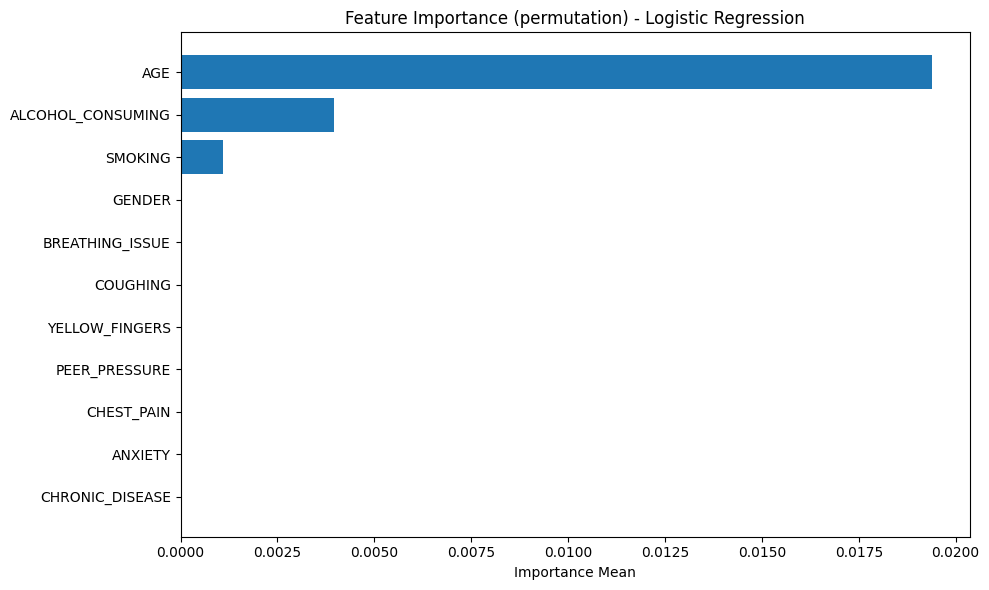

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(



=== Classification Report trên tập validation ===
              precision    recall  f1-score   support

           0     0.3328    0.5123    0.4035      1296
           1     0.7317    0.5643    0.6372      3055

    accuracy                         0.5488      4351
   macro avg     0.5323    0.5383    0.5204      4351
weighted avg     0.6129    0.5488    0.5676      4351

Final F1-score (label=1): 0.6372


In [ ]:
# 1. Tạo lưới siêu tham số
param_grid = {
    'C': np.round(np.arange(0.01, 2.01, 0.02), 2),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],  # saga hỗ trợ cả l1, l2, elasticnet
    'l1_ratio': [0.5]     # dùng cho elasticnet (bắt buộc khi chọn elasticnet)
}

# 2. Khởi tạo Logistic Regression
logreg = LogisticRegression(max_iter=10000, class_weight='balanced')

# 3. F1-score cho nhãn 1 (ung thư)
f1_cancer = make_scorer(f1_score, pos_label=1)

# 4. GridSearchCV để chọn tham số tối ưu
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring=f1_cancer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 5. Huấn luyện trên tập train
grid_search.fit(X_train, y_train)

# 6. Thông báo kết quả tốt nhất
print("\nBest parameters:", grid_search.best_params_)
print(f"Best F1-score (label=1): {grid_search.best_score_:.4f}")

# 7. Mô hình tốt nhất
best_model = grid_search.best_estimator_

# 8. Tính permutation importance trên tập validation
perm_importance = permutation_importance(best_model, X_val, y_val, n_repeats=100, random_state=42)

# 9. Biến DataFrame chứa độ quan trọng
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})
print(importance_df)

# 10. In các đặc trưng không quan trọng
print("\nCác thuộc tính có độ quan trọng âm:")
print(importance_df[importance_df['Importance Mean'] < 0])

# 11. Vẽ biểu đồ độ quan trọng
importance_df.sort_values(by='Importance Mean', ascending=True, inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance Mean'])
plt.xlabel('Importance Mean')
plt.title('Feature Importance (permutation) - Logistic Regression')
plt.tight_layout()
plt.show()

# 12. Chọn các đặc trưng quan trọng
important_features = importance_df[importance_df['Importance Mean'] > 0]['Feature']

# 13. Gộp lại tập train + val
X_train_val = pd.concat([X_train, X_val], axis=0)[important_features]
y_train_val = pd.concat([y_train, y_val], axis=0)

# 14. Huấn luyện lại trên toàn bộ tập train+val với đặc trưng tốt
best_model.fit(X_train_val, y_train_val)

# 15. Dự đoán lại trên tập validation cũ (để so sánh)
y_val_pred = best_model.predict(X_val[important_features])
print("\n=== Classification Report trên tập validation ===")
print(classification_report(y_val, y_val_pred, digits=4))

# 16. In F1-score cuối cùng
final_f1 = f1_score(y_val, y_val_pred, pos_label=1)
print(f"Final F1-score (label=1): {final_f1:.4f}")

## Random Forest

Fitting 5 folds for each of 486 candidates, totalling 2430 fits

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best F1-score (label=1): 0.7759

Các thuộc tính có độ quan trọng âm:
    Feature  Importance Mean  Importance Std
1   ANXIETY        -0.001002        0.002187
10   GENDER        -0.000715        0.001814


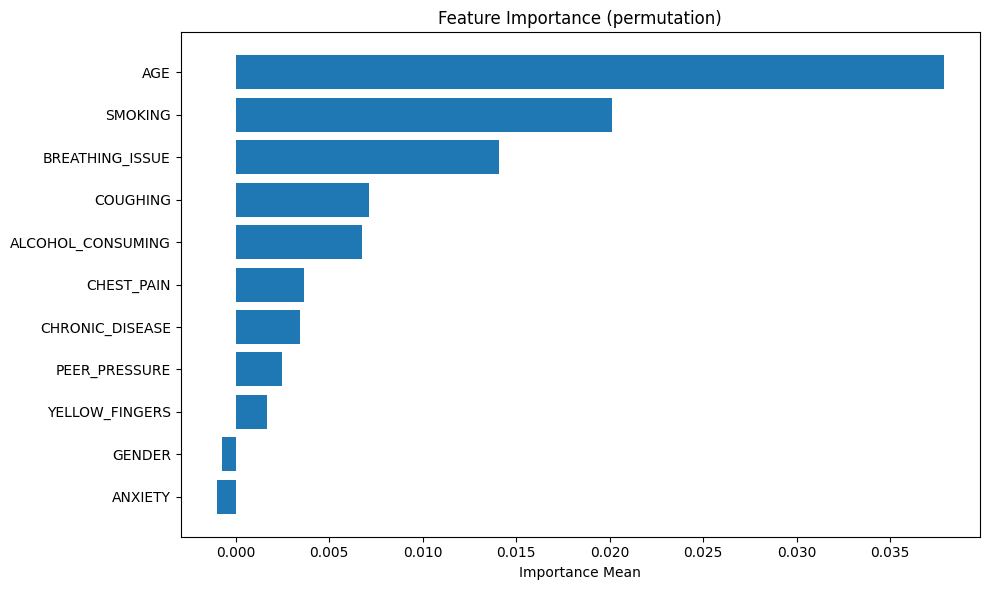


=== Classification Report trên tập validation ===
              precision    recall  f1-score   support

           0     0.5126    0.4066    0.4535      1296
           1     0.7686    0.8360    0.8009      3055

    accuracy                         0.7081      4351
   macro avg     0.6406    0.6213    0.6272      4351
weighted avg     0.6923    0.7081    0.6974      4351

Final F1-score (label=1): 0.8009


In [ ]:
# Định nghĩa các tham số cho GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [9, 10, 11],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced', random_state=42)

# Ưu tiên F1-score cho nhãn 1
f1_cancer = make_scorer(f1_score, pos_label=1)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f1_cancer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

# In ra kết quả tối ưu
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best F1-score (label=1): {grid_search.best_score_:.4f}")

# Mô hình tốt nhất
best_model = grid_search.best_estimator_

# Tính độ quan trọng của đặc trưng bằng permutation importance
perm_importance = permutation_importance(best_model, X_val, y_val, n_repeats=100, random_state=42)

# Tạo DataFrame độ quan trọng
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

# In các thuộc tính có độ quan trọng âm (không hữu ích)
print("\nCác thuộc tính có độ quan trọng âm:")
print(importance_df[importance_df['Importance Mean'] < 0])

# Vẽ biểu đồ độ quan trọng
importance_df.sort_values(by='Importance Mean', ascending=True, inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance Mean'])
plt.xlabel('Importance Mean')
plt.title('Feature Importance (permutation)')
plt.tight_layout()
plt.show()

# Lọc các đặc trưng quan trọng dương
important_features = importance_df[importance_df['Importance Mean'] > 0]['Feature']

# Gộp lại tập train + validation và chọn đặc trưng quan trọng
X_train_val = pd.concat([X_train, X_val], axis=0)[important_features]
y_train_val = pd.concat([y_train, y_val], axis=0)

# Huấn luyện lại mô hình tốt nhất với các đặc trưng quan trọng
best_model.fit(X_train_val, y_train_val)

# Đánh giá lại trên tập validation ban đầu
y_val_pred = best_model.predict(X_val[important_features])
print("\n=== Classification Report trên tập validation ===")
print(classification_report(y_val, y_val_pred, digits=4))

# In F1-score cuối cùng cho nhãn 1
final_f1 = f1_score(y_val, y_val_pred, pos_label=1)
print(f"Final F1-score (label=1): {final_f1:.4f}")


## Decision Tree


Best F1-score: 0.8153
Best Parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_impurity_decrease': np.float64(2e-06)}
              Feature  Importance Mean  Importance Std
0     CHRONIC_DISEASE         0.000000         0.00000
1             ANXIETY         0.000000         0.00000
2                 AGE         0.037941         0.00436
3          CHEST_PAIN         0.000000         0.00000
4       PEER_PRESSURE         0.000000         0.00000
5            COUGHING         0.000000         0.00000
6      YELLOW_FINGERS         0.000000         0.00000
7     BREATHING_ISSUE         0.000000         0.00000
8   ALCOHOL_CONSUMING         0.000000         0.00000
9             SMOKING         0.000000         0.00000
10             GENDER         0.000000         0.00000

Các đặc trưng có độ quan trọng âm:
Empty DataFrame
Columns: [Feature, Importance Mean, Importance Std]
Index: []


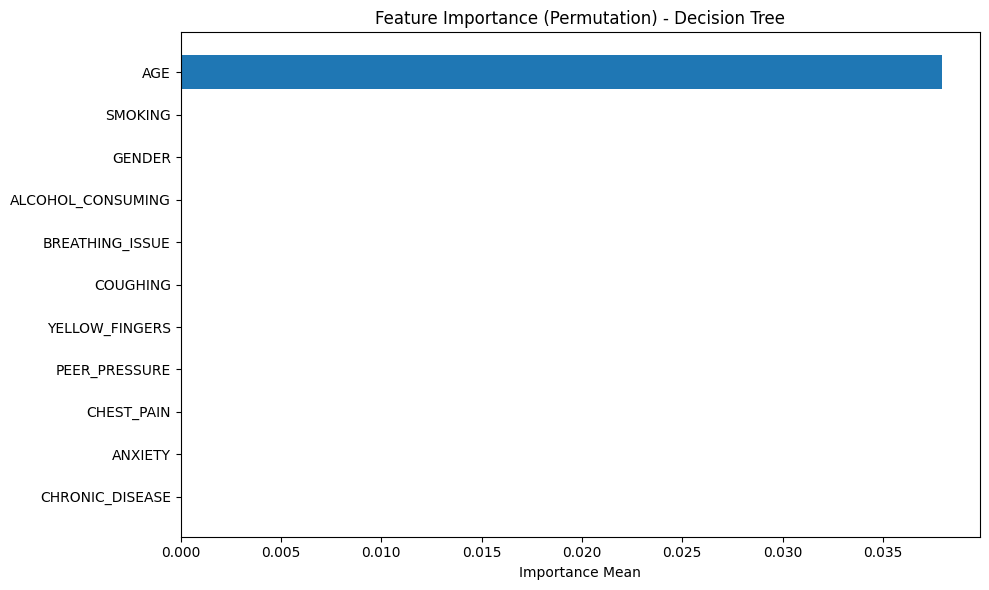


=== Classification Report trên tập validation ===
              precision    recall  f1-score   support

           0     0.5037    0.1574    0.2399      1296
           1     0.7233    0.9342    0.8153      3055

    accuracy                         0.7028      4351
   macro avg     0.6135    0.5458    0.5276      4351
weighted avg     0.6579    0.7028    0.6439      4351

Final F1-score (label=1): 0.8153


In [ ]:
# Định nghĩa các tham số cho GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [9, 10, 11],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced', random_state=42)

# Ưu tiên F1-score cho nhãn 1
f1_cancer = make_scorer(f1_score, pos_label=1)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f1_cancer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

# In ra kết quả tối ưu
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best F1-score (label=1): {grid_search.best_score_:.4f}")

# Mô hình tốt nhất
best_model = grid_search.best_estimator_

# Tính độ quan trọng của đặc trưng bằng permutation importance
perm_importance = permutation_importance(best_model, X_val, y_val, n_repeats=100, random_state=42)

# Tạo DataFrame độ quan trọng
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

# In các thuộc tính có độ quan trọng âm (không hữu ích)
print("\nCác thuộc tính có độ quan trọng âm:")
print(importance_df[importance_df['Importance Mean'] < 0])

# Vẽ biểu đồ độ quan trọng
importance_df.sort_values(by='Importance Mean', ascending=True, inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance Mean'])
plt.xlabel('Importance Mean')
plt.title('Feature Importance (permutation)')
plt.tight_layout()
plt.show()

# Lọc các đặc trưng quan trọng dương
important_features = importance_df[importance_df['Importance Mean'] > 0]['Feature']

# Gộp lại tập train + validation và chọn đặc trưng quan trọng
X_train_val = pd.concat([X_train, X_val], axis=0)[important_features]
y_train_val = pd.concat([y_train, y_val], axis=0)

# Huấn luyện lại mô hình tốt nhất với các đặc trưng quan trọng
best_model.fit(X_train_val, y_train_val)

# Đánh giá lại trên tập validation ban đầu
y_val_pred = best_model.predict(X_val[important_features])
print("\n=== Classification Report trên tập validation ===")
print(classification_report(y_val, y_val_pred, digits=4))

# In F1-score cuối cùng cho nhãn 1
final_f1 = f1_score(y_val, y_val_pred, pos_label=1)
print(f"Final F1-score (label=1): {final_f1:.4f}")

## Using Combined Strategy


===== Testing KNN with Combined Resampling Strategy =====
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Params: {'clf__n_neighbors': 19, 'clf__p': 2, 'clf__weights': 'uniform'}
Balanced Accuracy: 0.5390
F1-Score (Class 0): 0.3491
F1-Score (Class 1): 0.7295

Full Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.34      0.35      1296
           1       0.73      0.73      0.73      3055

    accuracy                           0.62      4351
   macro avg       0.54      0.54      0.54      4351
weighted avg       0.61      0.62      0.62      4351


===== Testing RandomForest with Combined Resampling Strategy =====
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'clf__max_depth': 10, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Balanced Accuracy: 0.5571
F1-Score (Class 0): 0.3212
F1-Score (Class 1): 0.7901

Full Classification Report:
              precision    recall  f

<Figure size 800x600 with 0 Axes>

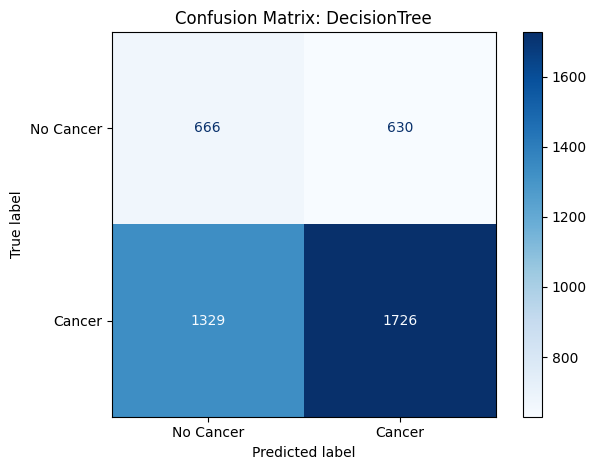

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, balanced_accuracy_score, make_scorer, ConfusionMatrixDisplay, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# ==== Load Data ====
column_names = [
    'CHRONIC_DISEASE', 'ANXIETY', 'AGE', 'CHEST_PAIN', 'LUNG_CANCER',
    'PEER_PRESSURE', 'COUGHING', 'YELLOW_FINGERS', 'BREATHING_ISSUE',
    'ALCOHOL_CONSUMING', 'SMOKING', 'GENDER'
]

data = pd.read_csv('dataset_normalized_fin.csv')
data.columns = column_names

X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==== Combined Strategy ====
combined_strategy = [
    ('over', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('under', RandomUnderSampler(sampling_strategy=0.8, random_state=42))
]

# ==== Models and Parameters ====
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'clf__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
            'clf__weights': ['uniform', 'distance'],
            'clf__p': [1, 2]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [50, 100],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 5]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        'param_grid': {
            'clf__criterion': ['gini', 'entropy', 'log_loss'],
            'clf__splitter': ['best', 'random'],
            'clf__max_depth': np.arange(1, 39),
            'clf__min_impurity_decrease': np.arange(start=0.000002, stop=0.00001, step=0.000002)
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, solver='liblinear', random_state=42, class_weight='balanced'),
        'param_grid': {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2']
        }
    }
}

results = []

# ==== Loop over Models ====
for model_name, config in models.items():
    print(f"\n===== Testing {model_name} with Combined Resampling Strategy =====")

    steps = combined_strategy + [
        ('scaler', StandardScaler()),
        ('clf', config['model'])
    ]
    pipeline = ImbPipeline(steps)

    scorer = make_scorer(balanced_accuracy_score)

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=config['param_grid'],
        scoring=scorer,
        cv=5,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    f1_class0 = report['0']['f1-score']
    f1_class1 = report['1']['f1-score']
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Balanced Accuracy': balanced_acc,
        'F1-Score (Class 0)': f1_class0,
        'F1-Score (Class 1)': f1_class1,
        'Full Report': classification_report(y_test, y_pred)
    })

    print(f"Best Params: {grid_search.best_params_}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"F1-Score (Class 0): {f1_class0:.4f}")
    print(f"F1-Score (Class 1): {f1_class1:.4f}")
    print("\nFull Classification Report:")
    print(classification_report(y_test, y_pred))

# ==== Best Model Summary ====
best_result = max(results, key=lambda x: x['Balanced Accuracy'])
print("\n=== Best Model Summary ===")
print(f"Model: {best_result['Model']}")
print(f"Best Parameters: {best_result['Best Parameters']}")
print(f"Balanced Accuracy: {best_result['Balanced Accuracy']:.4f}")
print(f"F1-Score (Class 0): {best_result['F1-Score (Class 0)']:.4f}")
print(f"F1-Score (Class 1): {best_result['F1-Score (Class 1)']:.4f}")
print("\nFull Classification Report:")
print(best_result['Full Report'])

# ==== Confusion Matrix for Best Model ====
best_model = [r for r in results if r['Model'] == best_result['Model']][0]
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix: {best_result["Model"]}')
plt.tight_layout()
plt.show()


## SMOTE


===== Testing KNN with SMOTE-only Strategy =====
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Params: {'clf__n_neighbors': 17, 'clf__p': 2, 'clf__weights': 'uniform'}
Balanced Accuracy: 0.5158
F1-Score (Class 0): 0.3391
F1-Score (Class 1): 0.6891

Full Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.36      0.34      1296
           1       0.71      0.67      0.69      3055

    accuracy                           0.58      4351
   macro avg       0.51      0.52      0.51      4351
weighted avg       0.59      0.58      0.58      4351


===== Testing RandomForest with SMOTE-only Strategy =====
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'clf__max_depth': 10, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Balanced Accuracy: 0.5419
F1-Score (Class 0): 0.3316
F1-Score (Class 1): 0.7533

Full Classification Report:
              precision    recall  f1-score   support


<Figure size 800x600 with 0 Axes>

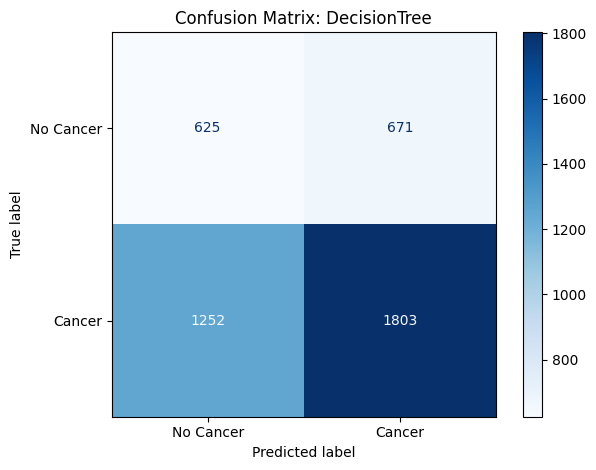

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, balanced_accuracy_score, make_scorer, ConfusionMatrixDisplay, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ==== Load Data ====
column_names = [
    'CHRONIC_DISEASE', 'ANXIETY', 'AGE', 'CHEST_PAIN', 'LUNG_CANCER',
    'PEER_PRESSURE', 'COUGHING', 'YELLOW_FINGERS', 'BREATHING_ISSUE',
    'ALCOHOL_CONSUMING', 'SMOKING', 'GENDER'
]

data = pd.read_csv('dataset_normalized_fin.csv')
data.columns = column_names

X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ====  SMOTE  ====
smote_only = [('over', SMOTE(sampling_strategy=0.9, random_state=42))]

# ==== Models and Parameters ====
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'clf__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
            'clf__weights': ['uniform', 'distance'],
            'clf__p': [1, 2]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [50, 100],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 5]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        'param_grid': {
            'clf__criterion': ['gini', 'entropy', 'log_loss'],
            'clf__splitter': ['best', 'random'],
            'clf__max_depth': np.arange(1, 39),
            'clf__min_impurity_decrease': np.arange(start=0.000002, stop=0.00001, step=0.000002)
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, solver='liblinear', random_state=42, class_weight='balanced'),
        'param_grid': {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2']
        }
    }
}

results = []

# ==== Loop over Models ====
for model_name, config in models.items():
    print(f"\n===== Testing {model_name} with SMOTE-only Strategy =====")

    steps = smote_only + [
        ('scaler', StandardScaler()),
        ('clf', config['model'])
    ]
    pipeline = ImbPipeline(steps)

    scorer = make_scorer(balanced_accuracy_score)

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=config['param_grid'],
        scoring=scorer,
        cv=5,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    f1_class0 = report['0']['f1-score']
    f1_class1 = report['1']['f1-score']
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Balanced Accuracy': balanced_acc,
        'F1-Score (Class 0)': f1_class0,
        'F1-Score (Class 1)': f1_class1,
        'Full Report': classification_report(y_test, y_pred)
    })

    print(f"Best Params: {grid_search.best_params_}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"F1-Score (Class 0): {f1_class0:.4f}")
    print(f"F1-Score (Class 1): {f1_class1:.4f}")
    print("\nFull Classification Report:")
    print(classification_report(y_test, y_pred))

# ==== Best Model Summary ====
best_result = max(results, key=lambda x: x['Balanced Accuracy'])
print("\n=== Best Model Summary ===")
print(f"Model: {best_result['Model']}")
print(f"Best Parameters: {best_result['Best Parameters']}")
print(f"Balanced Accuracy: {best_result['Balanced Accuracy']:.4f}")
print(f"F1-Score (Class 0): {best_result['F1-Score (Class 0)']:.4f}")
print(f"F1-Score (Class 1): {best_result['F1-Score (Class 1)']:.4f}")
print("\nFull Classification Report:")
print(best_result['Full Report'])

# ==== Confusion Matrix for Best Model ====
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix: {best_result["Model"]}')
plt.tight_layout()
plt.show()



===== Testing KNN with SMOTE-ENN Strategy =====
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Params: {'clf__n_neighbors': 11, 'clf__p': 2, 'clf__weights': 'uniform'}
Balanced Accuracy: 0.5374
F1-Score (Class 0): 0.3731
F1-Score (Class 1): 0.6936

Full Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.41      0.37      1296
           1       0.73      0.66      0.69      3055

    accuracy                           0.59      4351
   macro avg       0.53      0.54      0.53      4351
weighted avg       0.61      0.59      0.60      4351


===== Testing RandomForest with SMOTE-ENN Strategy =====
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Balanced Accuracy: 0.5508
F1-Score (Class 0): 0.3478
F1-Score (Class 1): 0.7560

Full Classification Report:
              precision    recall  f1-score   support

 

<Figure size 800x600 with 0 Axes>

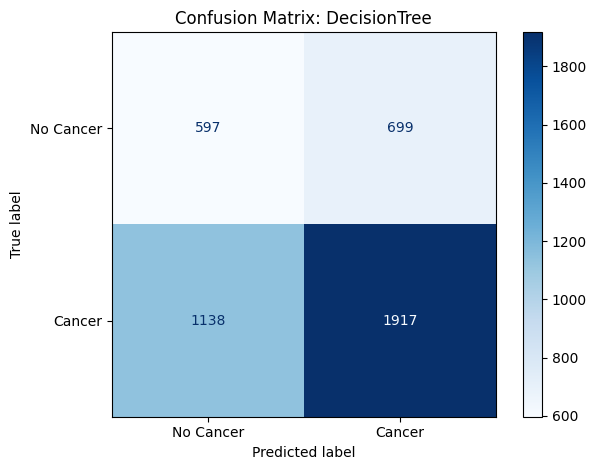

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, balanced_accuracy_score, make_scorer, ConfusionMatrixDisplay, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN, SMOTETomek  # Import SMOTEENN and SMOTETomek

# ==== Load Data ====
column_names = [
    'CHRONIC_DISEASE', 'ANXIETY', 'AGE', 'CHEST_PAIN', 'LUNG_CANCER',
    'PEER_PRESSURE', 'COUGHING', 'YELLOW_FINGERS', 'BREATHING_ISSUE',
    'ALCOHOL_CONSUMING', 'SMOKING', 'GENDER'
]

data = pd.read_csv('dataset_normalized_fin.csv')
data.columns = column_names

X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==== Choose SMOTE + ENN or SMOTE + Tomek ====

# Option 1: Using SMOTE + ENN
smote_enn = [('over', SMOTEENN(sampling_strategy=0.9, random_state=42))]

# Option 2: Using SMOTE + Tomek
# smote_tomek = [('over', SMOTETomek(sampling_strategy=0.9, random_state=42))]

# ==== Models and Parameters ====
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'clf__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
            'clf__weights': ['uniform', 'distance'],
            'clf__p': [1, 2]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [50, 100],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 5]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        'param_grid': {
            'clf__criterion': ['gini', 'entropy', 'log_loss'],
            'clf__splitter': ['best', 'random'],
            'clf__max_depth': np.arange(1, 39),
            'clf__min_impurity_decrease': np.arange(start=0.000002, stop=0.00001, step=0.000002)
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, solver='liblinear', random_state=42, class_weight='balanced'),
        'param_grid': {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2']
        }
    }
}

results = []

# ==== Loop over Models ====
for model_name, config in models.items():
    print(f"\n===== Testing {model_name} with SMOTE-ENN Strategy =====")

    steps = smote_enn + [  # Replace smote_enn with smote_tomek for the other strategy
        ('scaler', StandardScaler()),
        ('clf', config['model'])
    ]
    pipeline = ImbPipeline(steps)

    scorer = make_scorer(balanced_accuracy_score)

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=config['param_grid'],
        scoring=scorer,
        cv=5,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    f1_class0 = report['0']['f1-score']
    f1_class1 = report['1']['f1-score']
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Balanced Accuracy': balanced_acc,
        'F1-Score (Class 0)': f1_class0,
        'F1-Score (Class 1)': f1_class1,
        'Full Report': classification_report(y_test, y_pred)
    })

    print(f"Best Params: {grid_search.best_params_}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"F1-Score (Class 0): {f1_class0:.4f}")
    print(f"F1-Score (Class 1): {f1_class1:.4f}")
    print("\nFull Classification Report:")
    print(classification_report(y_test, y_pred))

# ==== Best Model Summary ====
best_result = max(results, key=lambda x: x['Balanced Accuracy'])
print("\n=== Best Model Summary ===")
print(f"Model: {best_result['Model']}")
print(f"Best Parameters: {best_result['Best Parameters']}")
print(f"Balanced Accuracy: {best_result['Balanced Accuracy']:.4f}")
print(f"F1-Score (Class 0): {best_result['F1-Score (Class 0)']:.4f}")
print(f"F1-Score (Class 1): {best_result['F1-Score (Class 1)']:.4f}")
print("\nFull Classification Report:")
print(best_result['Full Report'])

# ==== Confusion Matrix for Best Model ====
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix: {best_result["Model"]}')
plt.tight_layout()
plt.show()


# Train mô hình với dataset gốc

## Dataset 1: https://www.kaggle.com/datasets/akashnath29/lung-cancer-dataset

Số lượng nhãn:
LUNG_CANCER
1    1518
0    1482
Name: count, dtype: int64

Tỷ lệ phần trăm nhãn:
LUNG_CANCER
1    50.6
0    49.4
Name: proportion, dtype: float64

=== KNN ===
              precision    recall  f1-score   support

     Label 0       0.50      0.50      0.50       302
     Label 1       0.49      0.49      0.49       298

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.50      0.49      0.50       600



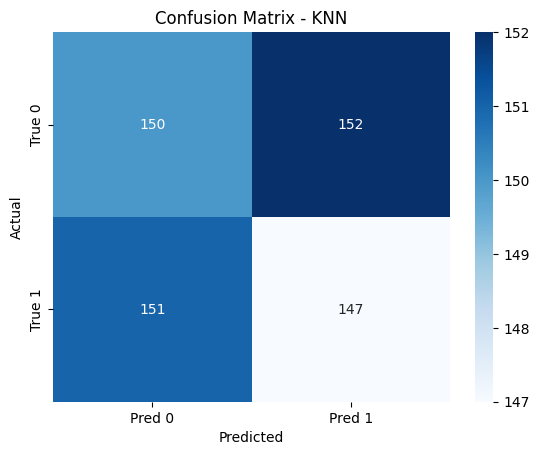


=== Logistic Regression ===
              precision    recall  f1-score   support

     Label 0       0.53      0.47      0.50       302
     Label 1       0.52      0.57      0.54       298

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



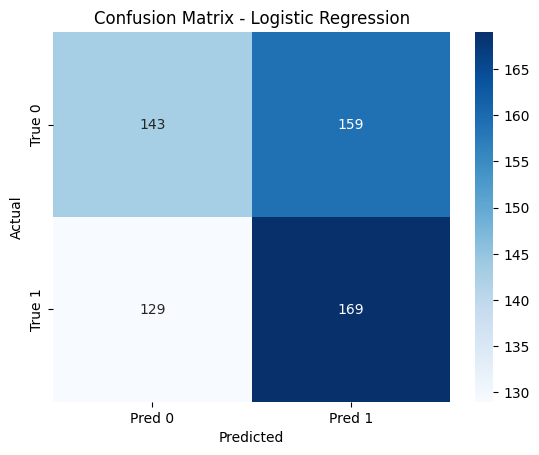


=== Random Forest ===
              precision    recall  f1-score   support

     Label 0       0.48      0.46      0.47       302
     Label 1       0.47      0.49      0.48       298

    accuracy                           0.47       600
   macro avg       0.48      0.48      0.47       600
weighted avg       0.48      0.47      0.47       600



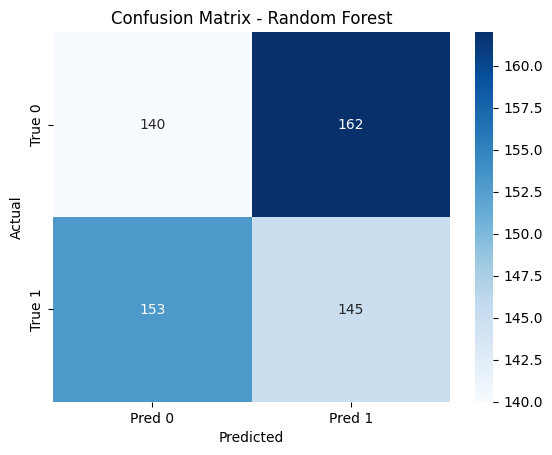

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu và mã hóa nhãn
df = pd.read_csv('dataset.csv')
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# 2. Thống kê nhãn
print("Số lượng nhãn:")
print(df['LUNG_CANCER'].value_counts())
print("\nTỷ lệ phần trăm nhãn:")
print(df['LUNG_CANCER'].value_counts(normalize=True) * 100)

# 3. Tách dữ liệu
X = df.drop(columns='LUNG_CANCER')
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Khởi tạo mô hình
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# 5. Train, dự đoán và đánh giá
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=["Label 0", "Label 1"]))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Pred 0", "Pred 1"],
                yticklabels=["True 0", "True 1"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Dataset 2: https://www.kaggle.com/datasets/shantanugarg274/lung-cancer-prediction-dataset


=== Model: kNN ===
              precision    recall  f1-score   support

  No Disease       0.89      0.86      0.87       593
     Disease       0.80      0.84      0.82       407

    accuracy                           0.85      1000
   macro avg       0.84      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



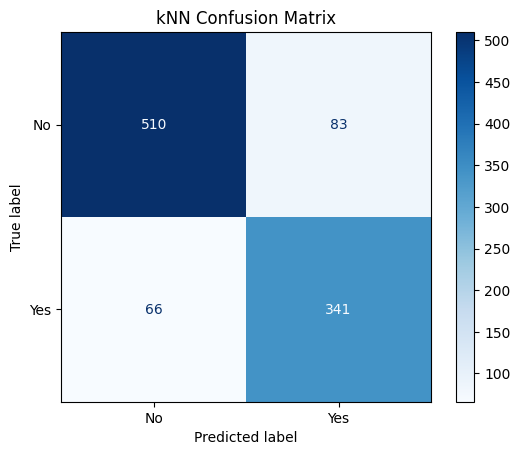

Recall of class 1 (Disease): 0.84
Recall of class 0 (No Disease): 0.86

=== Model: LogisticRegression ===
              precision    recall  f1-score   support

  No Disease       0.93      0.85      0.89       593
     Disease       0.81      0.91      0.86       407

    accuracy                           0.88      1000
   macro avg       0.87      0.88      0.87      1000
weighted avg       0.88      0.88      0.88      1000



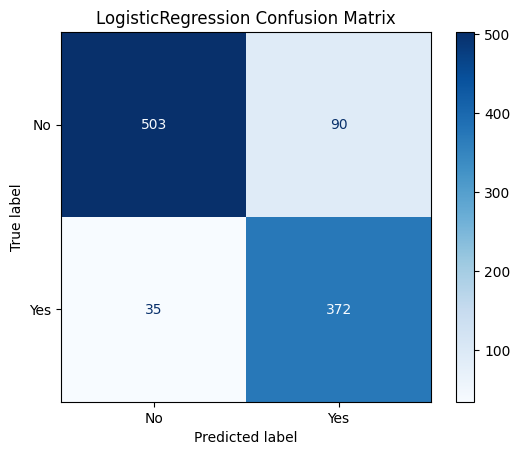

Recall of class 1 (Disease): 0.91
Recall of class 0 (No Disease): 0.85

=== Model: RandomForest ===
              precision    recall  f1-score   support

  No Disease       0.93      0.91      0.92       593
     Disease       0.87      0.89      0.88       407

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



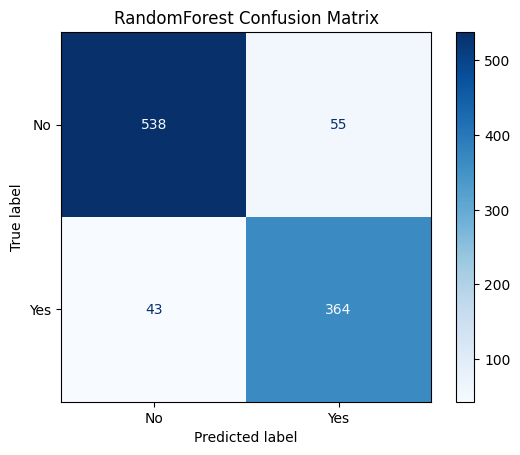

Recall of class 1 (Disease): 0.89
Recall of class 0 (No Disease): 0.91


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Load dữ liệu và encode nhãn
df = pd.read_csv('Lung Cancer Dataset.csv')
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'NO': 0, 'YES': 1})

# 2. Tách tập train/test
X = df.drop(columns=['PULMONARY_DISEASE'])
y = df['PULMONARY_DISEASE']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Định nghĩa pipelines cho từng model
pipelines = {
    'kNN': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=5))
    ]),
    'LogisticRegression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
    ]),
    'RandomForest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        # RandomForest không cần scaler, nhưng có thể thêm nếu muốn
        ('clf', RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=15,
            min_samples_leaf=10,
            class_weight='balanced',
            random_state=42
        ))
    ])
}

# 4. Huấn luyện, dự đoán và đánh giá
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"\n=== Model: {name} ===")
    # 4.1 Classification Report
    print(classification_report(y_test, y_pred, target_names=['No Disease','Disease']))

    # 4.2 Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['No','Yes'])
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # 4.3 Kiểm tra xem có bỏ lỡ hoàn toàn lớp 0 không:
    tn, fp, fn, tp = cm.ravel()
    recall_yes = tp / (tp + fn) if (tp+fn)>0 else 0
    print(f"Recall of class 1 (Disease): {recall_yes:.2f}")
    if recall_yes == 0:
        print("Warning: model is completely ignoring class 1!")
    recall_no = tn / (tn + fp) if (tn+fp)>0 else 0
    print(f"Recall of class 0 (No Disease): {recall_no:.2f}")
    if recall_no == 0:
        print("Warning: model is completely ignoring class 0!")


# Train mô hình trên kaggle với dataset gốc

## Dataset 1: https://www.kaggle.com/datasets/akashnath29/lung-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('dataset.csv')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
5,F,58,1,1,1,2,2,2,2,1,2,2,1,1,2,YES
6,F,70,1,1,1,2,2,1,2,2,2,2,2,2,1,YES
7,F,74,2,2,1,1,1,1,2,1,1,1,1,2,1,NO
8,M,77,1,2,1,2,1,1,1,1,2,1,1,1,2,NO
9,F,67,2,2,2,2,1,2,2,1,2,1,2,1,1,NO


In [ ]:
# labelencoding for numeric catagorical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_c=df[['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']]
for col in df_c.columns:
  df[col]=le.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix

x=df.drop(columns='LUNG_CANCER')
y=df['LUNG_CANCER']

# fake data
x, y = make_classification(n_samples=500, n_features=5, random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

models={
"LogisticRegression" : LogisticRegression(),
"RandomForest" : RandomForestClassifier(n_estimators=100, random_state=42),
"XGBClassifier" : XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
"KNN":KNeighborsClassifier(n_neighbors=10),
"DecisionTree":DecisionTreeClassifier(random_state=42),
"GradientBoosting": GradientBoostingClassifier(random_state=42),
" AdaBoostClassifier":AdaBoostClassifier(random_state=42)
}

for name,model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred) * 100
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f"Model: {name} | Accuracy: {accuracy:.2f}% | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

Model: LogisticRegression | Accuracy: 89.00% | Precision: 0.8600 | Recall: 0.9149 | F1-Score: 0.8866
Model: RandomForest | Accuracy: 96.00% | Precision: 0.9574 | Recall: 0.9574 | F1-Score: 0.9574
Model: XGBClassifier | Accuracy: 97.00% | Precision: 0.9583 | Recall: 0.9787 | F1-Score: 0.9684
Model: KNN | Accuracy: 94.00% | Precision: 0.9362 | Recall: 0.9362 | F1-Score: 0.9362
Model: DecisionTree | Accuracy: 96.00% | Precision: 0.9574 | Recall: 0.9574 | F1-Score: 0.9574


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:01:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: GradientBoosting | Accuracy: 96.00% | Precision: 0.9574 | Recall: 0.9574 | F1-Score: 0.9574
Model:  AdaBoostClassifier | Accuracy: 93.00% | Precision: 0.9167 | Recall: 0.9362 | F1-Score: 0.9263


Model:  AdaBoostClassifier | Accuracy: 97.00% | Precision: 0.9583 | Recall: 0.9787 | F1-Score: 0.9684


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:01:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


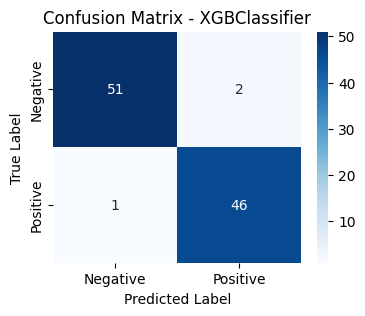

In [ ]:
# XGBClassifier is the high accuracy , precision and recall
XGBClassifier=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGBClassifier.fit(x_train, y_train)
y_pred = XGBClassifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Model: {name} | Accuracy: {accuracy:.2f}% | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBClassifier")
plt.show()

## Dataset 2: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"cancer patient data sets.csv")
pd.set_option('display.max_columns',None)

In [ ]:
# Dropping Unwanted columns
col=['index','Patient Id']
df.drop(columns=col,inplace=True,axis=1)

In [ ]:
#Encoding target column
df['Level']=df['Level'].apply(lambda x: 0 if x=='Low' else 1 if x=='Medium' else 2)

In [ ]:
# Splitting the Target column from the original dataset
x=df.drop(columns='Level')
y=df['Level']

# Calculating Mutual Information for capturing both linear and non-linear relationship
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                     Feature  Mutual Information
0             Passive Smoker            0.619859
1          Coughing of Blood            0.593427
2                Alcohol use            0.575542
3                    Obesity            0.550382
4                 Chest Pain            0.525670
5                   Wheezing            0.522652
6              Balanced Diet            0.467001
7               Dust Allergy            0.454374
8               Genetic Risk            0.434298
9        Shortness of Breath            0.425722
10                   Smoking            0.421925
11             Air Pollution            0.420345
12      OccuPational Hazards            0.402117
13                   Fatigue            0.388459
14                       Age            0.369777
15      chronic Lung Disease            0.364304
16  Clubbing of Finger Nails            0.294947
17                 Dry Cough            0.268212
18             Frequent Cold            0.249408
19               Wei

In [ ]:
# Splitting the data into Training (75%) and Testing (25%)
from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

In [ ]:
#importing
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

cm_t=[] #To store confusion matrices for training set
cm=[] #To store confusion matrices for testing set

#KNN
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,n_jobs=-1,random_state=20,scoring='accuracy',param_distributions=params,cv=10) #Finding Best K
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)
nknn=nknn.best_estimator_

pred_t=nknn.predict(x_t)
pred=nknn.predict(x_te)  #Predicting on the testing set
print('KNN Training Accuracy: ',accuracy_score(y_t,pred_t))
print('KNN Testing Accuracy: ',accuracy_score(y_te,pred))
print('\nClassification Report for KNN Classifier:\n\n ',classification_report(y_te,pred))
cmk_t=confusion_matrix(y_t,pred_t)
cm_t.append(cmk_t)
cmk=confusion_matrix(y_te,pred)
cm.append(cmk)

{'n_neighbors': np.int64(6)}
0.9973333333333333
KNN Training Accuracy:  0.9973333333333333
KNN Testing Accuracy:  1.0

Classification Report for KNN Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



{'ccp_alpha': np.float64(0.0)}
1.0
{'min_samples_split': np.int64(20), 'min_samples_leaf': np.int64(3), 'max_features': 'sqrt', 'criterion': 'entropy'}
0.9866666666666667


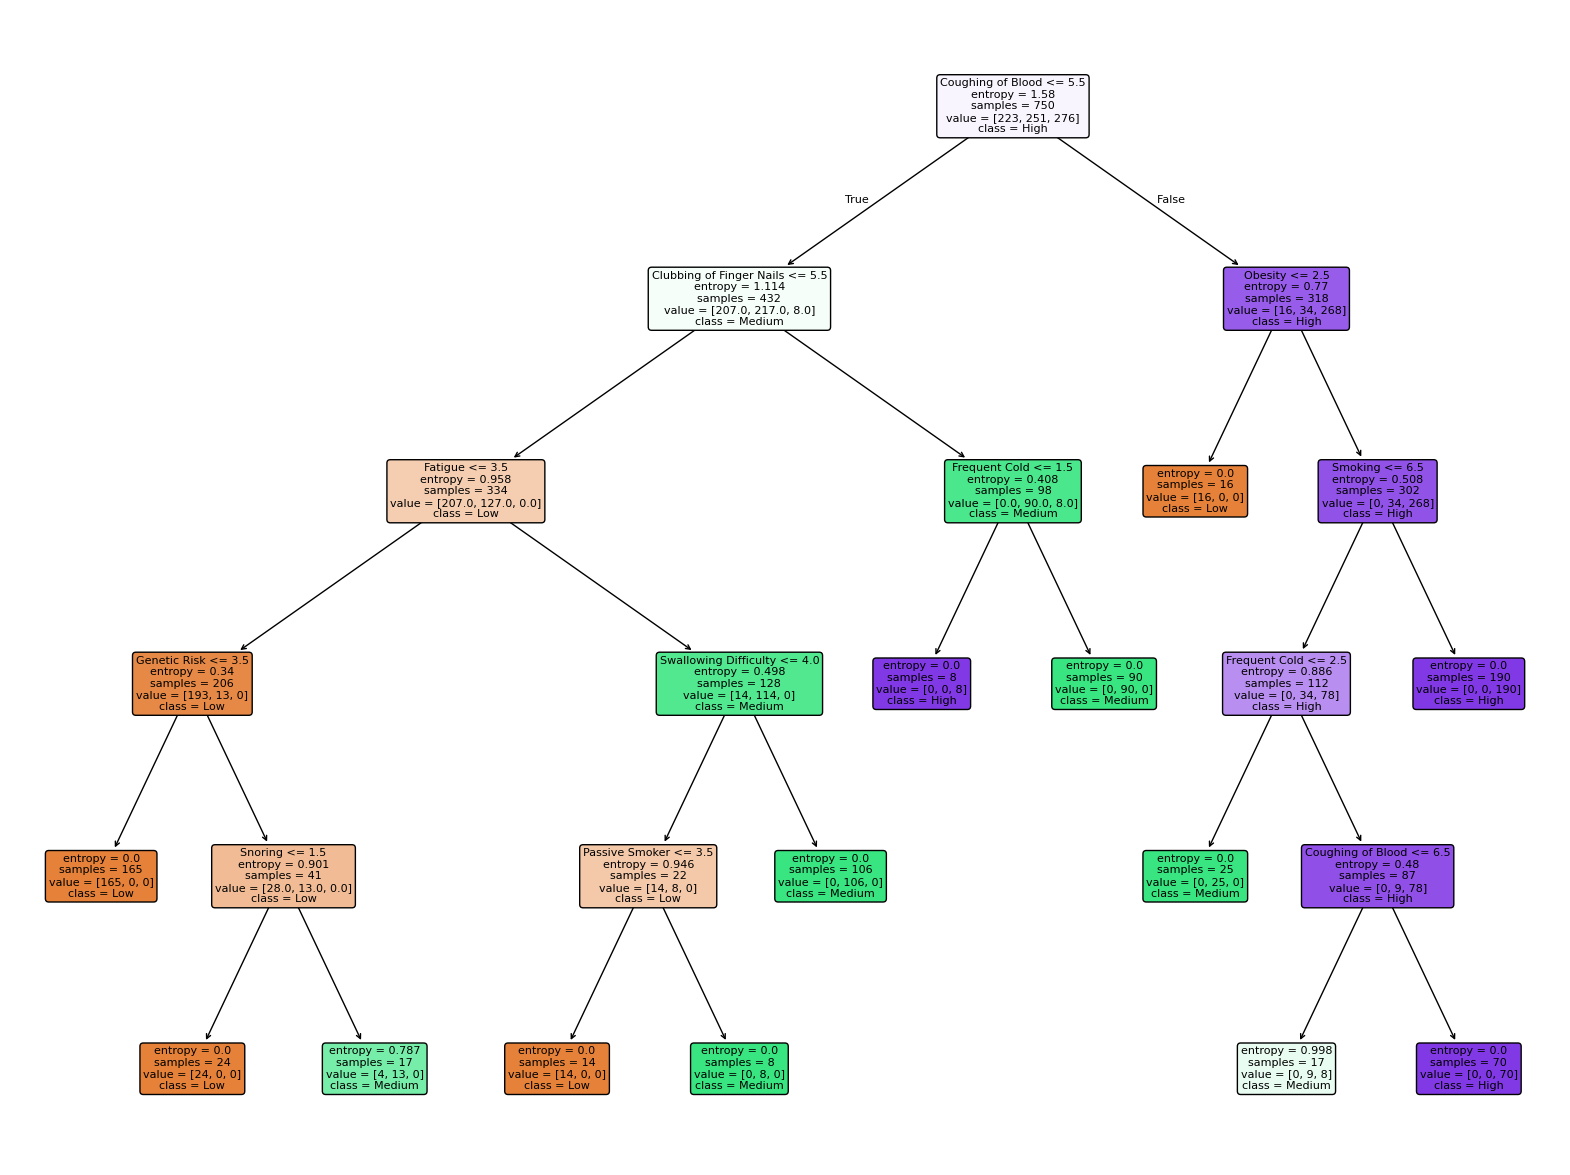

Decision Tree Classifier Training Accuracy:  0.984
Decision Tree Classifier Testing Accuracy:  0.968

Classification Report for Decision Tree Classifier Classifier:

                precision    recall  f1-score   support

           0       1.00      0.93      0.96        80
           1       0.91      1.00      0.95        81
           2       1.00      0.98      0.99        89

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [ ]:
# Decision Tree
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=GridSearchCV(dt,param_grid=params,n_jobs=-1,scoring='accuracy',cv=10)  # Finding Best Alpha
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

dt=DecisionTreeClassifier(ccp_alpha=best_alpha)
# Hyper Parameter Tuning -> We can use more parameters, descriptions of each paramter is available in the Decision Tree Documentation
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
        'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=params,scoring='accuracy',random_state=42,n_jobs=-1,cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

pred1_t=ndt.predict(x_t)
pred1=ndt.predict(x_te)  #Predicting on the testing set
print('Decision Tree Classifier Training Accuracy: ',accuracy_score(y_t,pred1_t))
print('Decision Tree Classifier Testing Accuracy: ',accuracy_score(y_te,pred1))
print('\nClassification Report for Decision Tree Classifier Classifier:\n\n ',classification_report(y_te,pred1))
cmdt_t=confusion_matrix(y_t,pred1_t)
cm_t.append(cmdt_t)
cmdt=confusion_matrix(y_te,pred1)
cm.append(cmdt)

In [ ]:
# Random Forest
rf=RandomForestClassifier()
# Hyper Parameter Tuning -> We can use more parameters, descriptions of each paramter is available in the Random Forest Classifier Documentation
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
        'max_features':['sqrt','log2',None],'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,scoring='accuracy',random_state=42,n_jobs=-1,cv=10)
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

pred2_t=nrf.predict(x_t)
pred2=nrf.predict(x_te)  #Predicting on the testing set
print('Random Forest Classifier Training Accuracy: ',accuracy_score(y_t,pred2_t))
print('Random Forest Classifier Testing Accuracy: ',accuracy_score(y_te,pred2))
print('\nClassification Report for Random Forest Classifier Classifier:\n\n ',classification_report(y_te,pred2))
cmrf_t=confusion_matrix(y_t,pred2_t)
cm_t.append(cmrf_t)
cmrf=confusion_matrix(y_te,pred2)
cm.append(cmrf)



{'n_estimators': 1000, 'min_samples_split': np.int64(27), 'min_samples_leaf': np.int64(6), 'max_features': 'log2', 'criterion': 'entropy'}
1.0
Random Forest Classifier Training Accuracy:  1.0
Random Forest Classifier Testing Accuracy:  1.0

Classification Report for Random Forest Classifier Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
# Ada Boost
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [300],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_

pred3_t=nada.predict(x_t)
pred3=nada.predict(x_te)
print('AdaBoost Classifier Training Accuracy: ',accuracy_score(y_t,pred3_t))
print('Adaboost Classifier Testing Accuracy: ',accuracy_score(y_te,pred3))
print('\nClassification Report for Random Forest Classifier Classifier:\n\n ',classification_report(y_te,pred2))
cmada_t=confusion_matrix(y_t,pred3_t)
cm_t.append(cmada_t)
cmada=confusion_matrix(y_te,pred3)
cm.append(cmada)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


{'n_estimators': 300, 'learning_rate': np.float64(0.27)}
1.0
AdaBoost Classifier Training Accuracy:  0.9906666666666667
Adaboost Classifier Testing Accuracy:  0.988

Classification Report for Random Forest Classifier Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
# All Model Report

tdf=pd.DataFrame({'Classification Algorithms':['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Training Accuracy':[accuracy_score(y_t,pred_t),accuracy_score(y_t,pred1_t),accuracy_score(y_t,pred2_t),accuracy_score(y_t,pred3_t)],
                  'Training Precision':[precision_score(y_t,pred_t,average='macro'),precision_score(y_t,pred1_t,average='macro'),precision_score(y_t,pred2_t,average='macro'),precision_score(y_t,pred3_t,average='macro')],
                  'Training Recall':[recall_score(y_t,pred_t,average='macro'),recall_score(y_t,pred1_t,average='macro'),recall_score(y_t,pred2_t,average='macro'),recall_score(y_t,pred3_t,average='macro')],
                  'Training F1 Score':[f1_score(y_t,pred_t,average='macro'),f1_score(y_t,pred1_t,average='macro'),f1_score(y_t,pred2_t,average='macro'),f1_score(y_t,pred3_t,average='macro')]})
tdf

tedf=pd.DataFrame({'Classification Algorithms':['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Testing Accuracy':[accuracy_score(y_te,pred),accuracy_score(y_te,pred1),accuracy_score(y_te,pred2),accuracy_score(y_te,pred3)],
                  'Testing Precision':[precision_score(y_te,pred,average='macro'),precision_score(y_te,pred1,average='macro'),precision_score(y_te,pred2,average='macro'),precision_score(y_te,pred3,average='macro')],
                  'Testing Recall':[recall_score(y_te,pred,average='macro'),recall_score(y_te,pred1,average='macro'),recall_score(y_te,pred2,average='macro'),recall_score(y_te,pred3,average='macro')],
                  'Testing F1 Score':[f1_score(y_te,pred,average='macro'),f1_score(y_te,pred1,average='macro'),f1_score(y_te,pred2,average='macro'),f1_score(y_te,pred3,average='macro')]})
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,KNN,1.000,1.000000,1.000000,1.000000
1,Decision Tree Classifier,0.968,0.970037,0.967509,0.967539
2,Random Forest Classifier,1.000,1.000000,1.000000,1.000000
3,AdaBoost Classifier,0.988,0.988095,0.987500,0.987570


## Dataset 3: https://www.kaggle.com/datasets/shantanugarg274/lung-cancer-prediction-dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('Lung Cancer Dataset.csv')

df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

x = df.drop('PULMONARY_DISEASE',axis = 1)
y = df['PULMONARY_DISEASE']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
# Visualization libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, random_state = 42)

models = {
    "Logistic Regression": LogisticRegression(C=1.0, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', C=1.0),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.5),
    "Bagging Classifier": BaggingClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=200)
}
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)  # Train
    y_pred = model.predict(x_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy
    results[name] = accuracy  # Store accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.9060
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       859
           1       0.89      0.90      0.89       641

    accuracy                           0.91      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.91      0.91      0.91      1500

--------------------------------------------------
Random Forest Accuracy: 0.9040
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       859
           1       0.90      0.87      0.89       641

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500

--------------------------------------------------
Support Vector Machine Accuracy: 0.8920
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       859
           1       0.88    

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8867
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       859
           1       0.88      0.85      0.86       641

    accuracy                           0.89      1500
   macro avg       0.89      0.88      0.88      1500
weighted avg       0.89      0.89      0.89      1500

--------------------------------------------------


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x = x,y=y, epochs =64,batch_size=64, validation_split=0.2)

Epoch 1/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6456 - loss: 0.6239 - val_accuracy: 0.8570 - val_loss: 0.4155
Epoch 2/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8703 - loss: 0.3700 - val_accuracy: 0.8880 - val_loss: 0.3498
Epoch 3/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9099 - loss: 0.3075 - val_accuracy: 0.8900 - val_loss: 0.3424
Epoch 4/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9099 - loss: 0.2925 - val_accuracy: 0.8920 - val_loss: 0.3346
Epoch 5/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9064 - loss: 0.3003 - val_accuracy: 0.9000 - val_loss: 0.3277
Epoch 6/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9057 - loss: 0.2965 - val_accuracy: 0.8960 - val_loss: 0.3247
Epoch 7/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9236 - loss: 0.2729 - val_accuracy: 0.8960 - val_loss: 0.3190
Epoch 8/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9186 - loss: 0.2654 - val_accuracy: 0.8970 - val_loss